# DS 862 Final Project - Customer Retention Analysis

## Author: Siddhant Navaratna

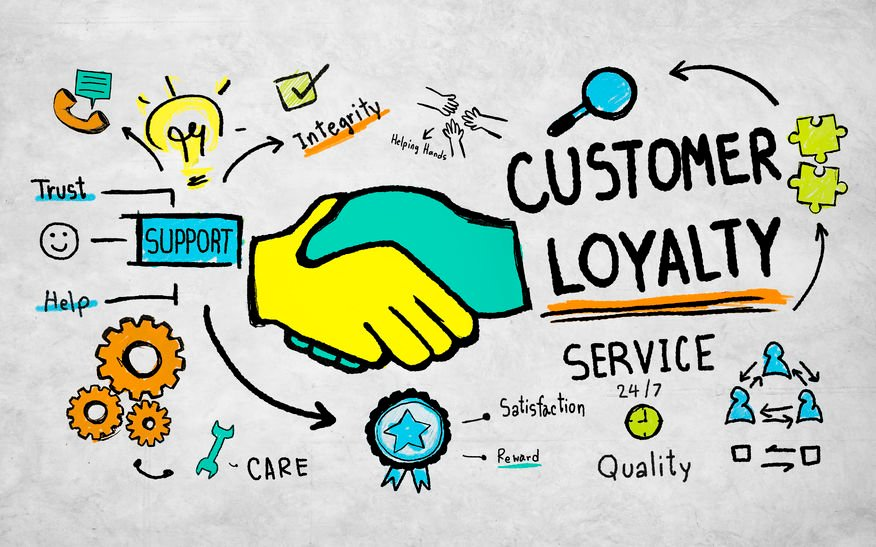

### Introduction

Customer retention is the ability of the product/service to retain its customers over a deterministic time period. Companies focus on buyer relationships with their customers to seek loyalty from the customers towards the brand. Acquiring a new customer is considerably expensive to a company than to retain an existing customer. Thus, customer retention has been an important application of data analytics in the recent years. One key metric of customer retention is Churn rate i.e., the percentage of customers lost during a period.

I am working on the Telecom Users dataset from the Kaggle competition. 
https://www.kaggle.com/radmirzosimov/telecom-users-dataset

In this project I have explored the features that affect the churn rate of the customer and used various machine learning algorithms to determine whether the customer will churn or not. Used the Lasso Regression to eliminate the features that were insignifacant and applied appropiate resampling methods to eliminate the imbalance of the classes.

The dataset contains 22 columns including the categorical and numerical features. The description of the each column is given below:

Predictor variables (X):

**gender** - client gender (male / female)

**SeniorCitizen** - is the client retired (1, 0)

**Partner** - is the client married (Yes, No)

**tenure** - how many months a person has been a client of the company

**PhoneService** - is the telephone service connected (Yes, No)

**MultipleLines** - are multiple phone lines connected (Yes, No, No phone service)

**InternetService** - client's Internet service provider (DSL, Fiber optic, No)

**OnlineSecurity** - is the online security service connected (Yes, No, No internet service)

**OnlineBackup** - is the online backup service activated (Yes, No, No internet service)

**DeviceProtection** - does the client have equipment insurance (Yes, No, No internet service)

**TechSupport** - is the technical support service connected (Yes, No, No internet service)

**StreamingTV** - is the streaming TV service connected (Yes, No, No internet service)

**StreamingMovies** - is the streaming cinema service activated (Yes, No, No internet service)

**Contract** - type of customer contract (Month-to-month, One year, Two year)

**PaperlessBilling** - whether the client uses paperless billing (Yes, No)

**PaymentMethod** - payment method (Electronic check, Mailed check, Bank transfer (automatic), Credit card (automatic))

**MonthlyCharges** - current monthly payment

**TotalCharges** - the total amount that the client paid for the services for the entire time

Response variable (y):

**Churn** - whether there was a churn (Yes or No)

In [1]:
# importing the required libraries
import pandas as pd
import numpy as np
import sklearn
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.simplefilter("ignore")

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier, AdaBoostClassifier, BaggingClassifier, VotingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from mixed_naive_bayes import MixedNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import plot_confusion_matrix, confusion_matrix, precision_score, accuracy_score, f1_score
from sklearn import model_selection, linear_model, feature_selection, preprocessing
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn import preprocessing
from sklearn.svm import LinearSVC, SVC
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

from imblearn.combine import SMOTETomek

In [2]:
# reading the data
data = pd.read_csv(r'C:\Users\siddh\Desktop\DS 862\Final Project\telecom_users.csv')
data

,Unnamed: 0,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,1869,7010-BRBUU,Male,0,Yes,Yes,72,Yes,Yes,No,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Credit card (automatic),24.10,1734.65,No
1,4528,9688-YGXVR,Female,0,No,No,44,Yes,No,Fiber optic,...,Yes,No,Yes,No,Month-to-month,Yes,Credit card (automatic),88.15,3973.2,No
2,6344,9286-DOJGF,Female,1,Yes,No,38,Yes,Yes,Fiber optic,...,No,No,No,No,Month-to-month,Yes,Bank transfer (automatic),74.95,2869.85,Yes
3,6739,6994-KERXL,Male,0,No,No,4,Yes,No,DSL,...,No,No,No,Yes,Month-to-month,Yes,Electronic check,55.90,238.5,No
4,432,2181-UAESM,Male,0,No,No,2,Yes,No,DSL,...,Yes,No,No,No,Month-to-month,No,Electronic check,53.45,119.5,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5981,3772,0684-AOSIH,Male,0,Yes,No,1,Yes,No,Fiber optic,...,No,No,Yes,Yes,Month-to-month,Yes,Electronic check,95.00,95,Yes
5982,5191,5982-PSMKW,Female,0,Yes,Yes,23,Yes,Yes,DSL,...,Yes,Yes,Yes,Yes,Two year,Yes,Credit card (automatic),91.10,2198.3,No
5983,5226,8044-BGWPI,Male,0,Yes,Yes,12,Yes,No,No,...,No internet service,No internet service,No internet service,No internet service,Month-to-month,Yes,Electronic check,21.15,306.05,No
5984,5390,7450-NWRTR,Male,1,No,No,12,Yes,Yes,Fiber optic,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.45,1200.15,Yes


## Data Cleaning

In [3]:
data.drop(columns=['Unnamed: 0','customerID'],axis=1,inplace=True) # dropping the unrequired columns
data['TotalCharges']=pd.to_numeric(data['TotalCharges'],errors='coerce') # Replacing the missing data by NaN
data.isnull().sum() # Checking the total number of null values in each column

gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        10
Churn                0
dtype: int64

In [4]:
data.groupby(['tenure'])['TotalCharges'].mean() # grouping the data based on tenure

tenure
0             NaN
1       50.678235
2      112.416495
3      174.513609
4      223.409416
         ...     
68    5099.965730
69    4851.573377
70    5580.856111
71    5181.844408
72    5835.293994
Name: TotalCharges, Length: 73, dtype: float64

In [5]:
data.TotalCharges = data.TotalCharges.fillna(0) # replacing the null values
data['SeniorCitizen'] = data.SeniorCitizen.astype(object) # converting the SeniorCitizen column into object datatype

## Exploratory Data Analysis

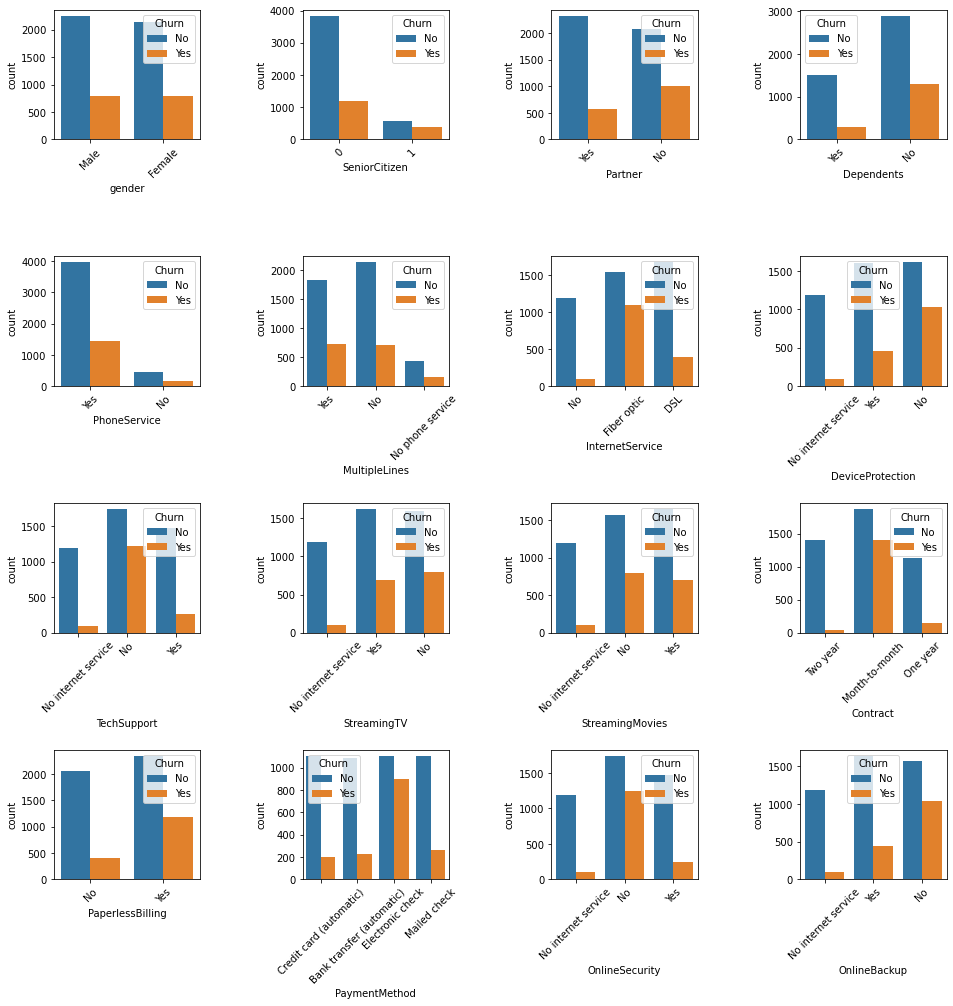

In [6]:
# plotting the countplot for all the categorical variables

fig = plt.figure(figsize=(16, 16))
fig.subplots_adjust(hspace=0.9, wspace=0.7)

ax = fig.add_subplot(4, 4, 1)
ax.set_xticklabels(ax.get_xticklabels(),rotation=45)
sns.countplot(x='gender', hue='Churn', data=data, ax=ax)

ax = fig.add_subplot(4, 4, 2)
ax.set_xticklabels(ax.get_xticklabels(),rotation=45)
sns.countplot(x='SeniorCitizen', hue='Churn', data=data, ax=ax)

ax = fig.add_subplot(4, 4, 3)
ax.set_xticklabels(ax.get_xticklabels(),rotation=45)
sns.countplot(x='Partner', hue='Churn', data=data, ax=ax)

ax = fig.add_subplot(4, 4, 4)
ax.set_xticklabels(ax.get_xticklabels(),rotation=45)
sns.countplot(x='Dependents', hue='Churn', data=data, ax=ax)

ax = fig.add_subplot(4, 4, 5)
ax.set_xticklabels(ax.get_xticklabels(),rotation=45)
sns.countplot(x='PhoneService', hue='Churn', data=data, ax=ax)

ax = fig.add_subplot(4, 4, 6)
ax.set_xticklabels(ax.get_xticklabels(),rotation=45)
sns.countplot(x='MultipleLines', hue='Churn', data=data, ax=ax)

ax = fig.add_subplot(4, 4, 7)
ax.set_xticklabels(ax.get_xticklabels(),rotation=45)
sns.countplot(x='InternetService', hue='Churn', data=data, ax=ax)

ax = fig.add_subplot(4, 4, 8)
ax.set_xticklabels(ax.get_xticklabels(),rotation=45)
sns.countplot(x='DeviceProtection', hue='Churn', data=data, ax=ax)

ax = fig.add_subplot(4, 4, 9)
ax.set_xticklabels(ax.get_xticklabels(),rotation=45)
sns.countplot(x='TechSupport', hue='Churn', data=data, ax=ax)

ax = fig.add_subplot(4, 4, 10)
ax.set_xticklabels(ax.get_xticklabels(),rotation=45)
sns.countplot(x='StreamingTV', hue='Churn', data=data, ax=ax)

ax = fig.add_subplot(4, 4, 11)
ax.set_xticklabels(ax.get_xticklabels(),rotation=45)
sns.countplot(x='StreamingMovies', hue='Churn', data=data, ax=ax)

ax = fig.add_subplot(4, 4, 12)
ax.set_xticklabels(ax.get_xticklabels(),rotation=45)
sns.countplot(x='Contract', hue='Churn', data=data, ax=ax)

ax = fig.add_subplot(4, 4, 13)
ax.set_xticklabels(ax.get_xticklabels(),rotation=45)
sns.countplot(x='PaperlessBilling', hue='Churn', data=data, ax=ax)

ax = fig.add_subplot(4, 4, 14)
ax.set_xticklabels(ax.get_xticklabels(),rotation=45)
sns.countplot(x='PaymentMethod', hue='Churn', data=data, ax=ax)

ax = fig.add_subplot(4, 4, 15)
ax.set_xticklabels(ax.get_xticklabels(),rotation=45)
sns.countplot(x='OnlineSecurity', hue='Churn', data=data, ax=ax)

ax = fig.add_subplot(4, 4, 16)
ax.set_xticklabels(ax.get_xticklabels(),rotation=45)
sns.countplot(x='OnlineBackup', hue='Churn', data=data, ax=ax)

plt.show()

The above count plots show the distribution of the all the features based on churn value. Observing the countplots, we can roughly say that there is imbalance between the classes in the dataset 

<AxesSubplot:>

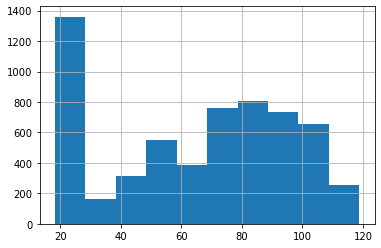

In [7]:
data['MonthlyCharges'].hist() # plotting the histogram of the numerical features

The histogram of Monthly charges suggests that majority of the customers have a monthly charges ranging from 20 to 30.

<AxesSubplot:>

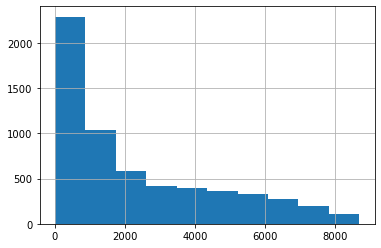

In [8]:
data['TotalCharges'].hist() # plotting the histogram of the numerical features

The histogram of the Total charges shows that bulk of the customers at the company have total charges 0 to 2000, which might suggest that the customers have been with the company for a smaller tenure. 

<AxesSubplot:>

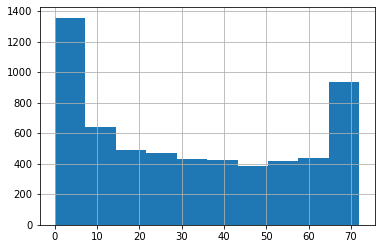

In [9]:
data['tenure'].hist() # plotting the histogram of the numerical features

The histogram of tenure shows that mode of the distribution lies between 0 and 10.

In [10]:
# encoding the categorical data using the map function 

data['gender'] = data['gender'].map({'Male':0, 'Female':1})
data['SeniorCitizen'] = data['SeniorCitizen'].map({0:0, 1:1})
data['Partner'] = data['Partner'].map({'No':0, 'Yes':1})
data['Dependents'] = data['Dependents'].map({'No':0, 'Yes':1})
data['PhoneService'] = data['PhoneService'].map({'No':0, 'Yes':1})
data['MultipleLines'] = data['MultipleLines'].map({'No':0, 'No phone service':1, 'Yes':2})
data['InternetService'] = data['InternetService'].map({'DSL':0, 'Fiber optic':1, 'No':2})
data['OnlineSecurity'] = data['OnlineSecurity'].map({'No':0, 'No internet service':1, 'Yes':2})
data['OnlineBackup'] = data['OnlineBackup'].map({'No':0, 'No internet service':1, 'Yes':2})
data['DeviceProtection'] = data['DeviceProtection'].map({'No':0, 'No internet service':1, 'Yes':2})
data['TechSupport'] = data['TechSupport'].map({'No':0, 'No internet service':1, 'Yes':2})
data['StreamingTV'] = data['StreamingTV'].map({'No':0, 'No internet service':1, 'Yes':2})
data['StreamingMovies'] = data['StreamingMovies'].map({'No':0, 'No internet service':1, 'Yes':2})
data['Contract'] = data['Contract'].map({'Month-to-month':0, 'One year':1, 'Two year':2})
data['PaperlessBilling'] = data['PaperlessBilling'].map({'No':0, 'Yes':1})
data['PaymentMethod'] = data['PaymentMethod'].map({'Bank transfer (automatic)':0, 'Credit card (automatic)':1, 'Electronic check':2, 'Mailed check':1})

data['Churn'] = data['Churn'].map({'No':0, 'Yes':1}) # mapping the churn to binary encoding
data

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,1,72,1,2,2,1,1,1,1,1,1,2,0,1,24.10,1734.65,0
1,1,0,0,0,44,1,0,1,0,2,2,0,2,0,0,1,1,88.15,3973.20,0
2,1,1,1,0,38,1,2,1,0,0,0,0,0,0,0,1,0,74.95,2869.85,1
3,0,0,0,0,4,1,0,0,0,0,0,0,0,2,0,1,2,55.90,238.50,0
4,0,0,0,0,2,1,0,0,2,0,2,0,0,0,0,0,2,53.45,119.50,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5981,0,0,1,0,1,1,0,1,2,0,0,0,2,2,0,1,2,95.00,95.00,1
5982,1,0,1,1,23,1,2,0,2,2,2,2,2,2,2,1,1,91.10,2198.30,0
5983,0,0,1,1,12,1,0,2,1,1,1,1,1,1,0,1,2,21.15,306.05,0
5984,0,1,0,0,12,1,2,1,0,0,2,0,2,2,0,1,2,99.45,1200.15,1


<AxesSubplot:>

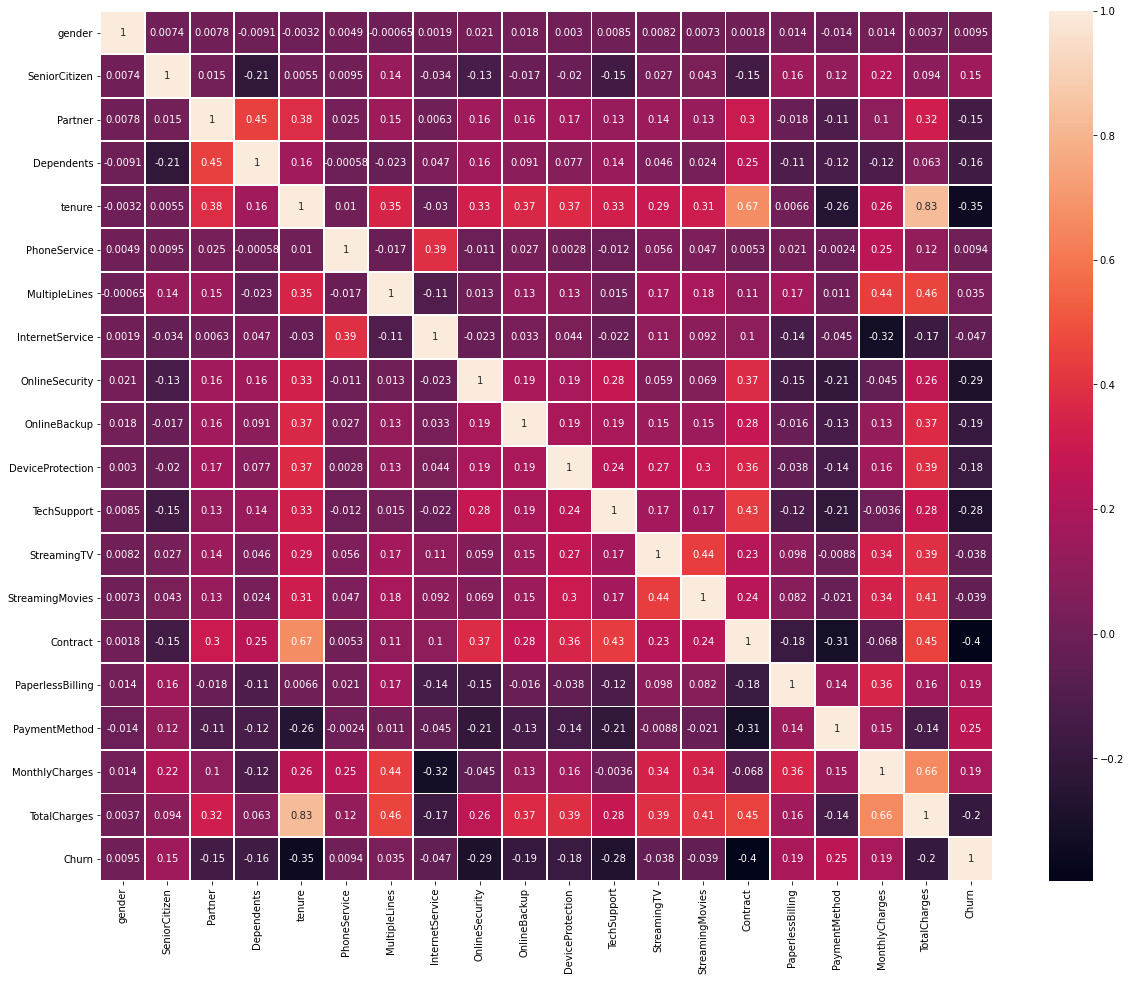

In [11]:
corr=data.corr()
# plot the heatmap
fig = plt.figure(figsize=(20,16))
sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns,
            linewidths=.75, fmt='.2g', annot=True)

The correlation plot of the data shows that the variables TotalCharges and tenure have high positive correlation. As we are looking to build a predictive model, we will not eliminate any variables even if they have high correlation.

Furthermore, there is moderate positive correlation between the variable pairs TotalCharges-MonthlyCharges and Contract-tenure.

In [12]:
data.Churn.value_counts() # analyzing the balance of the original dataset

0    4399
1    1587
Name: Churn, dtype: int64

The value count of classes clearly show that there is imbalance in our dataset. The ratio of the classes is 13:37 (approximately 1:3). Thus we need to use some sampling techniques to achieve a balance between the classes in our dataset. 

#### Train-Test split

In [13]:
# separating the predictor and response variables
X=data.drop('Churn',axis=1)
y=data['Churn']

In [14]:
X_train,X_test,y_train,y_test=train_test_split(X, y, test_size = 0.2, random_state = 862) # train-test splitting

# creating a copy of the training and testing dataset for future use
X_train2=X_train.copy() 
X_test2=X_test.copy()

## Feature Selection using Lasso Regression.

(array([1.e-10, 1.e-09, 1.e-08, 1.e-07, 1.e-06, 1.e-05, 1.e-04, 1.e-03,
       1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03, 1.e+04, 1.e+05,
       1.e+06, 1.e+07, 1.e+08, 1.e+09, 1.e+10]), [0.14476048266388925, 0.14476048259969587, 0.14476048195811925, 0.1447604755385969, 0.14476041139379203, 0.1447597720561723, 0.14475356938837577, 0.1447288426438818, 0.1463351624615016, 0.17406715103595458, 0.1959320660526747, 0.1959320660526747, 0.1959320660526747, 0.1959320660526747, 0.1959320660526747, 0.1959320660526747, 0.1959320660526747, 0.1959320660526747, 0.1959320660526747, 0.1959320660526747, 0.1959320660526747])


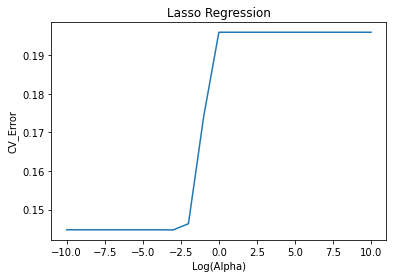

In [15]:
columnlist=X_train.columns.values # storing the column names
X_train=preprocessing.scale(X_train) # scaling the data
X_train=pd.DataFrame(X_train) # converting the series into a dataframe
X_train.columns=columnlist # assigning the column names

alphas = np.logspace(-10, 10, 21) # defining the alphas
alphas_index = np.linspace(-10, 10, 21) #defining the alphas_index

CV_Scores = [] # empty list to store Lasso CV scores

for a in alphas:
    lm = linear_model.Lasso(alpha=a)
    CV_Scores.append(- cross_val_score(lm, X_train, y_train, cv=10, 
                     scoring = 'neg_mean_squared_error').mean())

print((alphas, CV_Scores))

# Plotting the alpha and respective CV scores from LASSO regression 
plt.plot(alphas_index, CV_Scores)
plt.xlabel("Log(Alpha)")
plt.ylabel("CV_Error")
plt.title("Lasso Regression")
plt.show()

In [16]:
lm = linear_model.Lasso(alpha=0.001) 
lm.fit(X_train, y_train) #refitting the model with best alpha to obtain coefficients for the features
print(lm.coef_,X_train.columns)

[-0.          0.01506433 -0.00298486 -0.00617049 -0.05871423 -0.03184778
  0.01713868  0.0273169  -0.04286929 -0.02546591 -0.00998543 -0.03142929
  0.00248097  0.00024033 -0.038135    0.01810238  0.02181833  0.13994654
 -0.07999285] Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges'],
      dtype='object')


The Lasso coefficients with alpha=0.001 suggest that the predictor variable **gender** does not capture the variablity in the data. Thus we can eliminate this variables from our predictive models.

In [17]:
X_train.shape # analyzing the shape of the training data set

(4788, 19)

In [18]:
X_test.shape # analyzing the shape of the testing data set

(1198, 19)

In [19]:
# Separating the numerical and categorical features
num_features = ['tenure','MonthlyCharges','TotalCharges']
cat_features = ['SeniorCitizen', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport','StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling','PaymentMethod']

# Dropping the gender column from the dataset based on the coefficients obtained from LASSO regression
X_train2.drop(columns=['gender'],axis=1,inplace=True)
X_test2.drop(columns=['gender'],axis=1,inplace=True)

## Resampling using SMOTETomek 

As the initial data contained only about 6000 observation with 1:3 ratio of the classes, downsampling the data would have left me with a very small training dataset, not allowing the models to capture variance appropriately. On the other hand, upsampling the data would have added a high number of arbitrary entries in the dataset, thus introducing bias in the dataset. Thereforem T decided to combime the upsampling with downsampling which added only a smaller number of observations to the dataset thus allowing to maintain a decent bias-variance trade-off.

In [20]:
smt = SMOTETomek(random_state=862) # instantiating the SMOTETomek object
X_train_res,y_train_res=smt.fit_resample(X_train2,y_train) # resampling the train set
X_test_res,y_test_res=smt.fit_resample(X_test2,y_test) # resampling the test set

In [21]:
X_train_res.shape # analyzing the shape of the training data set

(6442, 18)

In [22]:
y_train_res.value_counts() # anlyzing the balance of the response variables in train set

1    3221
0    3221
Name: Churn, dtype: int64

In [23]:
X_test_res.shape # analyzing the shape of the testing data set

(1610, 18)

In [24]:
y_test_res.value_counts() # anlyzing the balance of the response variables in test set

1    805
0    805
Name: Churn, dtype: int64

## Classification Models

Now, I will go ahead and build various classification models with different initialization parameters to check which model performs the best for the given the data. We will be looking at different Logistic regression, Decision Tree classifier, Support Vector classifier, Naive Bayes, Multi Layer Perceptron, KNN classifier, and various Ensemble methods like Random Forest classifier, Gradient Boost classifier, XGBoost classifier, LGBM classifier, ADABoost Classifier, Bagged Logistic regression and voting classifier. Compare the F1 score and the False Positive rate of these classifiers to determine which model can be deployed. 

I am using the F1 score as an evaluation metric for the classification because it is the harmonic mean of the precision and recall. i.e it penalizes the outliers more to obtain a balanced score that can be a true representation is the performance of the model. Thus F1 score can be used for evaluating the classification of imbalanced dataset. 

Even though we have carried out resampling to remove the imbalance of classes, I am using the F1 score for evaluation just to make sure that we penalize any bias that may have been added into the dataset during upsampling.

In the case of this dataset, 1 is negative and 0 is positive. Wrongly predicting the customers staying at the company (i.e. False Positive) can be problem as it would mean the company not taking initiatives to retain a customer. Thus the model must aim at minimizing the false positive rate.

Therefore, in addition to the F1 score, I will be calculating the False Positive rate for the test set on all the models and use this to determine which model can be deployed in production. 

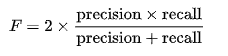

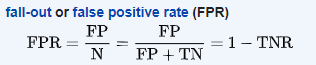

In [25]:
X_train2=pd.get_dummies(X_train_res,drop_first=True,columns=cat_features) # performing one-hot encoding on the train dataset
X_test2=pd.get_dummies(X_test_res,drop_first=True,columns=cat_features) # performing one-hot encoding on the test dataset

Logistic Regression

In [26]:
lr1=LogisticRegression(max_iter=1000, penalty='l1',solver='liblinear') # instantiating the model
lr1.fit(X_train2,y_train_res) # Fit the model
lr1_pred=lr1.predict(X_test2) # obtaining predictions

lr1_f1=f1_score(lr1_pred, y_test_res) # calculating F1 score

lr1_confmat=confusion_matrix(lr1_pred, y_test_res) # constructing confusion matrix
lr1_fpr=(lr1_confmat[0][1]/(lr1_confmat[0][1]+lr1_confmat[1][1]))*100 # calculating FPR

In [27]:
lr2=LogisticRegression(max_iter=1000) # instantiating the model
lr2.fit(X_train2,y_train_res) # Fit the model
lr2_pred=lr2.predict(X_test2) # obtaining predictions

lr2_f1=f1_score(lr2_pred, y_test_res) # calculating F1 score

lr2_confmat=confusion_matrix(lr2_pred, y_test_res) # constructing confusion matrix
lr2_fpr=(lr2_confmat[0][1]/(lr2_confmat[0][1]+lr2_confmat[1][1]))*100 # calculating FPR

In [28]:
lr3=LogisticRegression(max_iter=1000, penalty='l1',solver='saga') # instantiating the model
lr3.fit(X_train2,y_train_res) # Fit the model
lr3_pred=lr3.predict(X_test2) # obtaining predictions

lr3_f1=f1_score(lr2_pred, y_test_res) # calculating F1 score

lr3_confmat=confusion_matrix(lr3_pred, y_test_res) # constructing confusion matrix
lr3_fpr=(lr3_confmat[0][1]/(lr3_confmat[0][1]+lr3_confmat[1][1]))*100 # calculating FPR

In [29]:
lr4=LogisticRegression(max_iter=1000, penalty='l1',solver='liblinear') # instantiating the model
lr4.fit(X_train2,y_train_res) # Fit the model
lr4_pred=lr4.predict(X_test2) # obtaining predictions

lr4_f1=f1_score(lr4_pred, y_test_res) # calculating F1 score

lr4_confmat=confusion_matrix(lr4_pred, y_test_res) # constructing confusion matrix
lr4_fpr=(lr4_confmat[0][1]/(lr4_confmat[0][1]+lr4_confmat[1][1]))*100 # calculating FPR

Decision Tree Classifier

In [30]:
dtclf1 = DecisionTreeClassifier(max_leaf_nodes = 400, min_samples_leaf = 2, random_state = 862, criterion='entropy', splitter='random') # instantiating the model
dtclf1.fit(X_train2,y_train_res) # Fit the model
dtclf1_pred=dtclf1.predict(X_test2) # obtaining predictions

dtclf1_f1=f1_score(dtclf1_pred, y_test_res) # calculating F1 score

dtclf1_confmat=confusion_matrix(dtclf1_pred, y_test_res) # constructing confusion matrix
dtclf1_fpr=(dtclf1_confmat[0][1]/(dtclf1_confmat[0][1]+dtclf1_confmat[1][1]))*100 # calculating FPR

In [31]:
dtclf2 = DecisionTreeClassifier(max_leaf_nodes = 200, min_samples_leaf = 5, random_state = 862) # instantiating the model
dtclf2.fit(X_train2,y_train_res) # Fit the model
dtclf2_pred=dtclf2.predict(X_test2) # obtaining predictions

dtclf2_f1=f1_score(dtclf2_pred, y_test_res) # calculating F1 score

dtclf2_confmat=confusion_matrix(dtclf2_pred, y_test_res) # constructing confusion matrix
dtclf2_fpr=(dtclf2_confmat[0][1]/(dtclf2_confmat[0][1]+dtclf2_confmat[1][1]))*100 # calculating FPR

Naive Bayes Classifier

In [32]:
gnbclf2 = GaussianNB() # instantiating the model
gnbclf2.fit(X_train2,y_train_res) # Fit the model
gnbclf2_pred=gnbclf2.predict(X_test2) # obtaining predictions

gnbclf2_f1=f1_score(gnbclf2_pred, y_test_res) # calculating F1 score

gnbclf2_confmat=confusion_matrix(gnbclf2_pred, y_test_res) # constructing confusion matrix
gnbclf2_fpr=(gnbclf2_confmat[0][1]/(gnbclf2_confmat[0][1]+gnbclf2_confmat[1][1]))*100 # calculating FPR

In [33]:
mnbclf2 = MixedNB(categorical_features = [0]) # instantiating the model
mnbclf2.fit(X_train2, y_train_res) # Fit the model
mnbclf2_pred=mnbclf2.predict(X_test2) # obtaining predictions

mnbclf2_f1=f1_score(mnbclf2_pred, y_test_res) # calculating F1 score

mnbclf2_confmat=confusion_matrix(mnbclf2_pred, y_test_res) # constructing confusion matrix
mnbclf2_fpr=(mnbclf2_confmat[0][1]/(mnbclf2_confmat[0][1]+mnbclf2_confmat[1][1]))*100 # calculating FPR

[73]


MLP Classifier

In [34]:
mlp_clf2= MLPClassifier(hidden_layer_sizes=100, activation='relu', solver='adam', learning_rate='adaptive') # instantiating the model
mlp_clf2.fit(X_train2,y_train_res) # Fit the model
mlp_clf2_pred=mlp_clf2.predict(X_test2) # obtaining predictions

mlp_clf2_f1=f1_score(mlp_clf2_pred, y_test_res) # calculating F1 score

mlp_clf2_confmat=confusion_matrix(mlp_clf2_pred, y_test_res) # constructing confusion matrix
mlp_clf2_fpr=(mlp_clf2_confmat[0][1]/(mlp_clf2_confmat[0][1]+mlp_clf2_confmat[1][1]))*100 # calculating FPR

Support Vector Classifiers

In [35]:
# Linear Classifier
svm_clf2 = Pipeline([
                    ('scalar', StandardScaler()),                # scaling the data
                    ('linear_svc', LinearSVC(C = 100, loss = "hinge", random_state = 862, max_iter = 10000000))
                    ]) # instantiating the model
svm_clf2.fit(X_train2, y_train_res) # Fit the model
svm_clf2_pred=svm_clf2.predict(X_test2) # obtaining predictions

svm_clf2_f1=f1_score(svm_clf2_pred, y_test_res) # calculating F1 score

svm_clf2_confmat=confusion_matrix(svm_clf2_pred, y_test_res) # constructing confusion matrix
svm_clf2_fpr=(svm_clf2_confmat[0][1]/(svm_clf2_confmat[0][1]+svm_clf2_confmat[1][1]))*100 # calculating FPR

In [36]:
svm_clf_pipe2 = Pipeline([
    ('scaler', StandardScaler()),                  # scaling the data
    ('svm_clf', SVC(probability=True, random_state = 862))           
]) # instantiating the model
parameters = { 'svm_clf__kernel' : ['rbf','sigmoid'],
             'svm_clf__C' : [ 0.1, 1, 10, 100],
             'svm_clf__gamma': [0.1,0.5]}             # Setting the parameters
grid_svm_clf2 = GridSearchCV(svm_clf_pipe2, parameters, cv=5, n_jobs=-1)
grid_svm_clf2.fit(X_train2, y_train_res)  # Fit the model
grid_svm_clf2_pred=grid_svm_clf2.predict(X_test2) # obtaining predictions

grid_svm_clf2_f1=f1_score(grid_svm_clf2_pred, y_test_res) # calculating F1 score

grid_svm_clf2_confmat=confusion_matrix(grid_svm_clf2_pred, y_test_res) # constructing confusion matrix
grid_svm_clf2_fpr=(grid_svm_clf2_confmat[0][1]/(grid_svm_clf2_confmat[0][1]+grid_svm_clf2_confmat[1][1]))*100 # calculating FPR

KNN classifier

The optimal number of neighbors is 3 with 79.7% accuracy


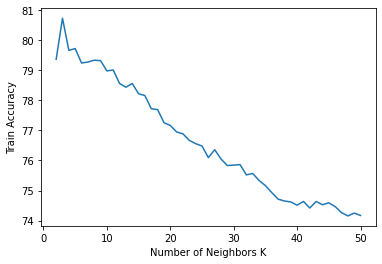

In [37]:
#we will try to find witch K is the best on our data

neighbors = [x for x in list(range(2,51))] #Neighbors

CV_scores = [] # empty list to store CV_scores

#Performing 10-fold cross validation on training set to determine best value of k:
for k in neighbors:
    knn = KNeighborsClassifier(n_neighbors = k, weights='uniform', p=2, metric='euclidean')
    kfold = model_selection.KFold(n_splits=10, random_state=862, shuffle=True)
    scores = model_selection.cross_val_score(knn, X_train2, y_train_res, cv=kfold, scoring='accuracy')
    CV_scores.append(scores.mean()*100)

opt_k = neighbors[CV_scores.index(max(CV_scores))]
print(( "The optimal number of neighbors is %d with %0.1f%% accuracy" % (opt_k, CV_scores[opt_k])))

plt.plot(neighbors, CV_scores)
plt.xlabel('Number of Neighbors K')
plt.ylabel('Train Accuracy')
plt.show()

In [38]:
knnclf2= KNeighborsClassifier(n_neighbors=3) # instantiating the model
knnclf2.fit(X_train2, y_train_res) # Fit the model
knnclf2_pred=knnclf2.predict(X_test2) # obtaining predictions

knnclf2_f1=f1_score(knnclf2_pred, y_test_res) # calculating F1 score

knnclf2_confmat=confusion_matrix(knnclf2_pred, y_test_res) # constructing confusion matrix
knnclf2_fpr=(knnclf2_confmat[0][1]/(knnclf2_confmat[0][1]+knnclf2_confmat[1][1]))*100 # calculating FPR

Ensemble Classifiers

In [39]:
rfclf1 = RandomForestClassifier(n_estimators = 1000,min_samples_split=5, random_state = 862) # instantiating the model
rfclf1.fit(X_train2,y_train_res) # Fit the model
rfclf1_pred=rfclf1.predict(X_test2) # obtaining predictions

rfclf1_f1=f1_score(rfclf1_pred, y_test_res) # calculating F1 score

rfclf1_confmat=confusion_matrix(rfclf1_pred, y_test_res) # constructing confusion matrix
rfclf1_fpr=(rfclf1_confmat[0][1]/(rfclf1_confmat[0][1]+rfclf1_confmat[1][1]))*100 # calculating FPR

In [40]:
rfclf2 = RandomForestClassifier(n_estimators = 500,criterion = 'entropy',random_state = 862) # instantiating the model
rfclf2.fit(X_train2,y_train_res) # Fit the model
rfclf2_pred=rfclf2.predict(X_test2) # obtaining predictions

rfclf2_f1=f1_score(rfclf2_pred, y_test_res) # calculating F1 score

rfclf2_confmat=confusion_matrix(rfclf2_pred, y_test_res) # constructing confusion matrix
rfclf2_fpr=(rfclf2_confmat[0][1]/(rfclf2_confmat[0][1]+rfclf2_confmat[1][1]))*100 # calculating FPR

In [41]:
gbclf1 = GradientBoostingClassifier(n_estimators = 1000, loss='exponential', random_state = 862, min_samples_split=5) # instantiating the model
gbclf1.fit(X_train2,y_train_res) # Fit the model
gbclf1_pred=gbclf1.predict(X_test2) # obtaining predictions

gbclf1_f1=f1_score(gbclf1_pred, y_test_res) # calculating F1 score

gbclf1_confmat=confusion_matrix(gbclf1_pred, y_test_res) # constructing confusion matrix
gbclf1_fpr=(gbclf1_confmat[0][1]/(gbclf1_confmat[0][1]+gbclf1_confmat[1][1]))*100 # calculating FPR

In [42]:
gbclf2 = GradientBoostingClassifier(n_estimators = 500, max_depth=10,random_state = 862) # instantiating the model
gbclf2.fit(X_train2,y_train_res) # Fit the model
gbclf2_pred=gbclf2.predict(X_test2) # obtaining predictions

gbclf2_f1=f1_score(gbclf2_pred, y_test_res) # calculating F1 score

gbclf2_confmat=confusion_matrix(gbclf2_pred, y_test_res) # constructing confusion matrix
gbclf2_fpr=(gbclf2_confmat[0][1]/(gbclf2_confmat[0][1]+gbclf2_confmat[1][1]))*100 # calculating FPR

In [43]:
xgbclf1 = XGBClassifier(n_estimators = 1000, max_depth=1000, random_state = 862, eval_metric='error') # instantiating the model
xgbclf1.fit(X_train2,y_train_res) # Fit the model
xgbclf1_pred=xgbclf1.predict(X_test2) # obtaining predictions

xgbclf1_f1=f1_score(xgbclf1_pred, y_test_res) # calculating F1 score

xgbclf1_confmat=confusion_matrix(xgbclf1_pred, y_test_res) # constructing confusion matrix
xgbclf1_fpr=(xgbclf1_confmat[0][1]/(xgbclf1_confmat[0][1]+xgbclf1_confmat[1][1]))*100 # calculating FPR

In [44]:
xgbclf2 = XGBClassifier(n_estimators = 500,random_state = 862, verbosity = 0) # instantiating the model
xgbclf2.fit(X_train2,y_train_res) # Fit the model
xgbclf2_pred=xgbclf2.predict(X_test2) # obtaining predictions

xgbclf2_f1=f1_score(xgbclf2_pred, y_test_res) # calculating F1 score

xgbclf2_confmat=confusion_matrix(xgbclf2_pred, y_test_res) # constructing confusion matrix
xgbclf2_fpr=(xgbclf2_confmat[0][1]/(xgbclf2_confmat[0][1]+xgbclf2_confmat[1][1]))*100 # calculating FPR

In [45]:
adabclf1 = AdaBoostClassifier(n_estimators = 1000,random_state = 862) # instantiating the model
adabclf1.fit(X_train2,y_train_res) # Fit the model
adabclf1_pred=adabclf1.predict(X_test2) # obtaining predictions

adabclf1_f1=f1_score(adabclf1_pred, y_test_res) # calculating F1 score

adabclf1_confmat=confusion_matrix(adabclf1_pred, y_test_res) # constructing confusion matrix
adabclf1_fpr=(adabclf1_confmat[0][1]/(adabclf1_confmat[0][1]+adabclf1_confmat[0][1]))*100 # calculating FPR

In [46]:
adabclf2 = AdaBoostClassifier(n_estimators = 500,random_state = 862) # instantiating the model
adabclf2.fit(X_train2,y_train_res) # Fit the model
adabclf2_pred=adabclf2.predict(X_test2) # obtaining predictions

adabclf2_f1=f1_score(adabclf2_pred, y_test_res) # calculating F1 score

adabclf2_confmat=confusion_matrix(adabclf2_pred, y_test_res) # constructing confusion matrix
adabclf2_fpr=(adabclf2_confmat[0][1]/(adabclf2_confmat[0][1]+adabclf2_confmat[0][1]))*100 # calculating FPR

In [47]:
lgbmclf1 = LGBMClassifier(n_estimators = 1000,random_state = 862, boosting_type='dart' ) # instantiating the model
lgbmclf1.fit(X_train2,y_train_res) # Fit the model
lgbmclf1_pred=lgbmclf1.predict(X_test2) # obtaining predictions

lgbmclf1_f1=f1_score(lgbmclf1_pred, y_test_res) # calculating F1 score

lgbmclf1_confmat=confusion_matrix(lgbmclf1_pred, y_test_res) # constructing confusion matrix
lgbmclf1_fpr=(lgbmclf1_confmat[0][1]/(lgbmclf1_confmat[0][1]+lgbmclf1_confmat[1][1]))*100 # calculating FPR

In [48]:
lgbmclf2 = LGBMClassifier(n_estimators = 500,random_state = 862) # instantiating the model
lgbmclf2.fit(X_train2,y_train_res) # Fit the model
lgbmclf2_pred=lgbmclf2.predict(X_test2) # obtaining predictions

lgbmclf2_f1=f1_score(lgbmclf2_pred, y_test_res) # calculating F1 score

lgbmclf2_confmat=confusion_matrix(lgbmclf2_pred, y_test_res) # constructing confusion matrix
lgbmclf2_fpr=(lgbmclf2_confmat[0][1]/(lgbmclf2_confmat[0][1]+lgbmclf2_confmat[1][1]))*100 # calculating FPR

In [49]:
bag_clf1 = BaggingClassifier(LogisticRegression(), n_estimators = 500, random_state = 862) # instantiating the model
bag_clf1.fit(X_train2,y_train_res) # Fit the model
bag_clf1_pred=bag_clf1.predict(X_test2) # obtaining predictions

bag_clf1_f1=f1_score(bag_clf1_pred, y_test_res) # calculating F1 score

bag_clf1_confmat=confusion_matrix(bag_clf1_pred, y_test_res) # constructing confusion matrix
bag_clf1_fpr=(bag_clf1_confmat[0][1]/(bag_clf1_confmat[0][1]+bag_clf1_confmat[1][1]))*100 # calculating FPR

In [50]:
bag_clf2 = BaggingClassifier(LogisticRegression(penalty = 'l1', solver = 'liblinear'), n_estimators = 200, random_state = 862) # instantiating the model
bag_clf2.fit(X_train2,y_train_res) # Fit the model
bag_clf2_pred=bag_clf2.predict(X_test2) # obtaining predictions

bag_clf2_f1=f1_score(bag_clf2_pred, y_test_res) # calculating F1 score

bag_clf2_confmat=confusion_matrix(bag_clf2_pred, y_test_res) # constructing confusion matrix
bag_clf2_fpr=(bag_clf2_confmat[0][1]/(bag_clf2_confmat[0][1]+bag_clf2_confmat[1][1]))*100 # calculating FPR

In [51]:
vc_soft_clf1 = VotingClassifier(estimators = [('lr1', lr1), ('lr2', lr2), ('dtclf1', dtclf1), 
                                    ('rfclf1', rfclf1), ('gbclf1', gbclf1), ('xgbclf2', xgbclf1), ('adabclf1', adabclf1),
                                        ('lgbmclf1', lgbmclf1), ('bag_clf1', bag_clf1), ('mlp_clf2', mlp_clf2)], n_jobs = 2, voting='soft') # instantiating the model

vc_soft_clf1.fit(X_train2, y_train_res) # Fit the model

vc_soft_clf1_pred=vc_soft_clf1.predict(X_test2) # obtaining predictions

vc_soft_clf1_f1=f1_score(vc_soft_clf1_pred, y_test_res) # calculating F1 score

vc_soft_clf1_confmat=confusion_matrix(vc_soft_clf1_pred, y_test_res) # constructing confusion matrix
vc_soft_clf1_fpr=(vc_soft_clf1_confmat[0][1]/(vc_soft_clf1_confmat[0][1]+vc_soft_clf1_confmat[1][1]))*100 # calculating FPR

In [52]:
vc_soft_clf2 = VotingClassifier(estimators = [('lr3', lr3), ('lr4', lr3), ('dtclf2', dtclf2), 
                                    ('rfclf2', rfclf2), ('gbcl2', gbclf2), ('xgbclf2', xgbclf2), ('adabclf2', adabclf2),
                                    ('lgbmclf2', lgbmclf2), ('bag_clf2', bag_clf2), ('knnclf2', knnclf2)], n_jobs = 2, voting='soft') # instantiating the model

vc_soft_clf2.fit(X_train2, y_train_res) # Fit the model

vc_soft_clf2_pred=vc_soft_clf2.predict(X_test2) # obtaining predictions

vc_soft_clf2_f1=f1_score(vc_soft_clf2_pred, y_test_res) # calculating F1 score

vc_soft_clf2_confmat=confusion_matrix(vc_soft_clf2_pred, y_test_res) # constructing confusion matrix
vc_soft_clf2_fpr=(vc_soft_clf2_confmat[0][1]/(vc_soft_clf2_confmat[0][1]+vc_soft_clf2_confmat[1][1]))*100 # calculating FPR

We can use the confusion matrices to visually analyze the performance of the classification algorithms on the test set.

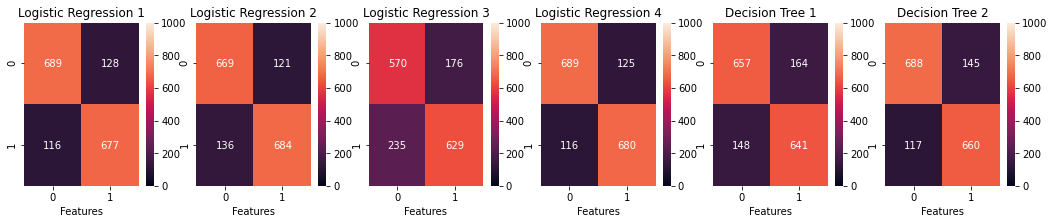

In [53]:
c, (ax1,ax2,ax3,ax4,ax5,ax6) = plt.subplots(1,6,figsize = (18,3))

# 1. Logistic Regression 1
sns.heatmap(lr1_confmat, annot = True, fmt = 'd', vmin = 0, vmax = 1000, ax = ax1)
ax1.set_title('Logistic Regression 1')
ax1.set_xlabel('Features')

# 2. Logistic Regression 2
sns.heatmap(lr2_confmat, annot = True, fmt = 'd', vmin = 0, vmax = 1000, ax = ax2)
ax2.set_title('Logistic Regression 2')
ax2.set_xlabel('Features')

# 3. Logistic Regression 3
sns.heatmap(lr3_confmat, annot = True, fmt = 'd', vmin = 0, vmax = 1000, ax = ax3)
ax3.set_title('Logistic Regression 3')
ax3.set_xlabel('Features')

# 4. Logistic Regression 4
sns.heatmap(lr4_confmat, annot = True, fmt = 'd', vmin = 0, vmax = 1000, ax = ax4)
ax4.set_title('Logistic Regression 4')
ax4.set_xlabel('Features')

# 5. Decision Tree 1
sns.heatmap(dtclf1_confmat, annot = True, fmt = 'd', vmin = 0, vmax = 1000, ax = ax5)
ax5.set_title('Decision Tree 1')
ax5.set_xlabel('Features')

# 6. Decision Tree 2
sns.heatmap(dtclf2_confmat, annot = True, fmt = 'd', vmin = 0, vmax = 1000, ax = ax6)
ax6.set_title('Decision Tree 2')
ax6.set_xlabel('Features')

plt.show()

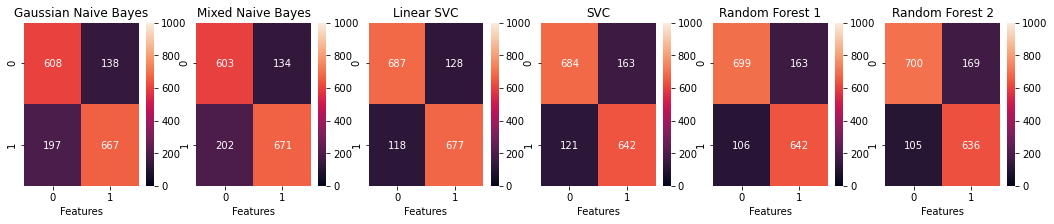

In [54]:
c, (ax7,ax8,ax9,ax10,ax11,ax12) = plt.subplots(1,6,figsize = (18,3))

# 7. Gaussian Naive Bayes
sns.heatmap(gnbclf2_confmat, annot = True, fmt = 'd', vmin = 0, vmax = 1000, ax = ax7)
ax7.set_title('Gaussian Naive Bayes')
ax7.set_xlabel('Features')

# 8. Mixed Naive Bayes
sns.heatmap(mnbclf2_confmat, annot = True, fmt = 'd', vmin = 0, vmax = 1000, ax = ax8)
ax8.set_title('Mixed Naive Bayes')
ax8.set_xlabel('Features')

# 9. Linear SVC
sns.heatmap(svm_clf2_confmat, annot = True, fmt = 'd', vmin = 0, vmax = 1000, ax = ax9)
ax9.set_title('Linear SVC')
ax9.set_xlabel('Features')

# 10. SVC Classifier with parameter tuning
sns.heatmap(grid_svm_clf2_confmat, annot = True, fmt = 'd', vmin = 0, vmax = 1000, ax = ax10)
ax10.set_title('SVC')
ax10.set_xlabel('Features')

# 11. Random Forest 2
sns.heatmap(rfclf1_confmat, annot = True, fmt = 'd', vmin = 0, vmax = 1000, ax = ax11)
ax11.set_title('Random Forest 1')
ax11.set_xlabel('Features')

# 12.Random Forest 2
sns.heatmap(rfclf2_confmat, annot = True, fmt = 'd', vmin = 0, vmax = 1000, ax = ax12)
ax12.set_title('Random Forest 2')
ax12.set_xlabel('Features')

plt.show()

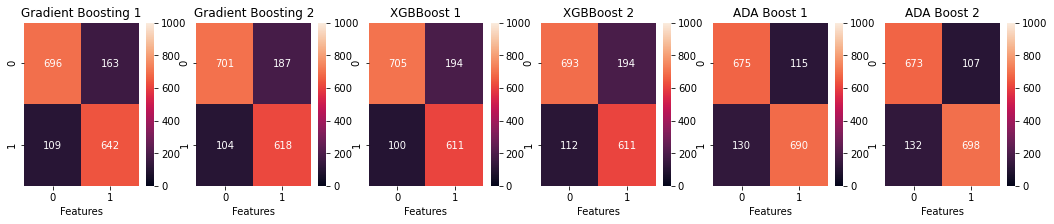

In [55]:
c, (ax13,ax14,ax15,ax16,ax17,ax18) = plt.subplots(1,6,figsize = (18,3))

# 13. Gradient Boosting 1
sns.heatmap(gbclf1_confmat, annot = True, fmt = 'd', vmin = 0, vmax = 1000, ax = ax13)
ax13.set_title('Gradient Boosting 1')
ax13.set_xlabel('Features')

# 14. Gradient Boosting 2
sns.heatmap(gbclf2_confmat, annot = True, fmt = 'd', vmin = 0, vmax = 1000, ax = ax14)
ax14.set_title('Gradient Boosting 2')
ax14.set_xlabel('Features')

# 15. XGBoost 1 
sns.heatmap(xgbclf1_confmat, annot = True, fmt = 'd', vmin = 0, vmax = 1000, ax = ax15)
ax15.set_title('XGBBoost 1')
ax15.set_xlabel('Features')

# 16. XGBoost 2
sns.heatmap(xgbclf2_confmat, annot = True, fmt = 'd', vmin = 0, vmax = 1000, ax = ax16)
ax16.set_title('XGBBoost 2')
ax16.set_xlabel('Features')

# 17. ADABoost 1
sns.heatmap(adabclf1_confmat, annot = True, fmt = 'd', vmin = 0, vmax = 1000, ax = ax17)
ax17.set_title('ADA Boost 1')
ax17.set_xlabel('Features')

# 18. ADABoost 2
sns.heatmap(adabclf2_confmat, annot = True, fmt = 'd', vmin = 0, vmax = 1000, ax = ax18)
ax18.set_title('ADA Boost 2')
ax18.set_xlabel('Features')

plt.show()

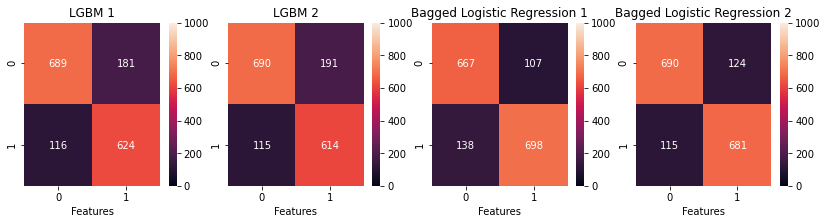

In [56]:
c, (ax19,ax20,ax21,ax22) = plt.subplots(1,4,figsize = (14,3))

# 19. LGBM 1
sns.heatmap(lgbmclf1_confmat, annot = True, fmt = 'd', vmin = 0, vmax = 1000, ax = ax19)
ax19.set_title('LGBM 1')
ax19.set_xlabel('Features')

# 20. LGBM 2
sns.heatmap(lgbmclf2_confmat, annot = True, fmt = 'd', vmin = 0, vmax = 1000, ax = ax20)
ax20.set_title('LGBM 2')
ax20.set_xlabel('Features')

# 21. Bagged Logistic Regression 1
sns.heatmap(bag_clf1_confmat, annot = True, fmt = 'd', vmin = 0, vmax = 1000, ax = ax21)
ax21.set_title('Bagged Logistic Regression 1')
ax21.set_xlabel('Features')

# 22. Bagged Logistic Regression 2
sns.heatmap(bag_clf2_confmat, annot = True, fmt = 'd', vmin = 0, vmax = 1000, ax = ax22)
ax22.set_title('Bagged Logistic Regression 2')
ax22.set_xlabel('Features')

plt.show()

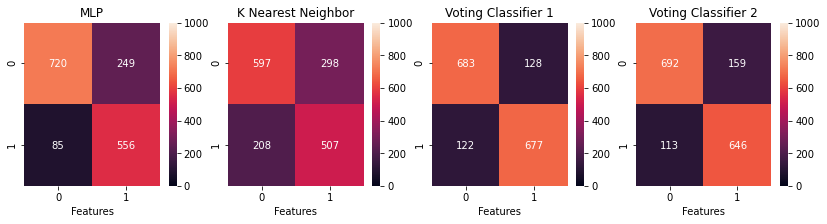

In [57]:
f, (ax23,ax24,ax25,ax26) = plt.subplots(1,4,figsize = (14,3))

# 23. Multi Layer Perceptron
sns.heatmap(mlp_clf2_confmat, annot = True, fmt = 'd', vmin = 0, vmax = 1000, ax = ax23)
ax23.set_title('MLP')
ax23.set_xlabel('Features')

# 24. K Nearest Neighbor
sns.heatmap(knnclf2_confmat, annot = True, fmt = 'd', vmin = 0, vmax = 1000, ax = ax24)
ax24.set_title('K Nearest Neighbor')
ax24.set_xlabel('Features')

# 25. Voting Classifier 1
sns.heatmap(vc_soft_clf1_confmat, annot = True, fmt = 'd', vmin = 0, vmax = 1000, ax = ax25)
ax25.set_title('Voting Classifier 1')
ax25.set_xlabel('Features')

# 25. Voting Classifier 2
sns.heatmap(vc_soft_clf2_confmat, annot = True, fmt = 'd', vmin = 0, vmax = 1000, ax = ax26)
ax26.set_title('Voting Classifier 2')
ax26.set_xlabel('Features')

plt.show()

The pictoral representation of classification does provide a brief idea on the performance of the classification models in terms of accuracy, but tabulating the results would give us a better idea on how the models stand in terms of their performance metrics we discussed earlier.

In [58]:
f1_scores=[] #empty list to store F1 scores
fpr=[] # empty list to store FPR
models = [lr1, lr2, lr3, lr4, dtclf1, dtclf2, gnbclf2, mnbclf2,
          svm_clf2, grid_svm_clf2, rfclf1, rfclf2, gbclf1, gbclf2,
          xgbclf1, xgbclf2, adabclf1, adabclf2, lgbmclf1, lgbmclf2,
          bag_clf1, bag_clf2, mlp_clf2, knnclf2, vc_soft_clf1, vc_soft_clf2] # list containing the model names for iteration

for model in models:
    f1_scores.append((f1_score(model.predict(X_test2),y_test_res))*100) # adding F1 scores of each model to the f1_scores list 
    model_confmat=confusion_matrix(model.predict(X_test2),y_test_res)
    fpr.append((model_confmat[0][1]/(model_confmat[0][1]+model_confmat[1][1]))*100)    # adding FPR of each model to the FPR list

In [59]:
models = ['lr1', 'lr2', 'lr3', 'lr4', 'dtclf1', 'dtclf2', 'gnbclf2', 'mnbclf2',
          'svm_clf2', 'grid_svm_clf2', 'rfclf1', 'rfclf2', 'gbclf1', 'gbclf2',
          'xgbclf1', 'xgbclf2', 'adabclf1', 'adabclf2', 'lgbmclf1', 'lgbmclf2',
          'bag_clf1', 'bag_clf2', 'mlp_clf2', 'knnclf2', 'vc_soft_clf1', 'vc_soft_clf2'] # list containing the model names to add into the results dataframe 

In [60]:
# creating individual dataframes for each list
results = pd.DataFrame(models) 
results1 = pd.DataFrame(f1_scores)
results2 = pd.DataFrame(fpr)

In [61]:
results['f1_scores']=results1[0] # adding the F1 scores in the results dataframe
results['fpr']=results2[0] # adding the FPR in the results dataframe
results = results.rename(columns={0: 'Model','f1_scores': 'F1 Score', 'fpr': 'FPR'}) # renaming the columns
results=results.sort_values(['F1 Score', 'FPR'], ascending=[False, True]) # sorting the results dataframe in order to analyze the best result
results

,Model,F1 Score,FPR
17,adabclf2,85.382263,13.291925
21,bag_clf2,85.071830,15.403727
20,bag_clf1,85.070079,13.291925
3,lr4,84.946908,15.527950
16,adabclf1,84.923077,14.285714
0,lr1,84.730914,15.900621
8,svm_clf2,84.625000,15.900621
24,vc_soft_clf1,84.413965,15.900621
1,lr2,84.184615,15.031056
5,dtclf2,83.438685,18.012422


We can see from the above table that the **adabclf2** model performs the best with F1 score of 85.38% and False positive rate of 13.29%. Thus we can deploy this model in the production.

Let us analyze the importance of the features from our dataset that contribute to the best performing model. 

Text(0.5, 1.0, 'Feature Importance of the best model')

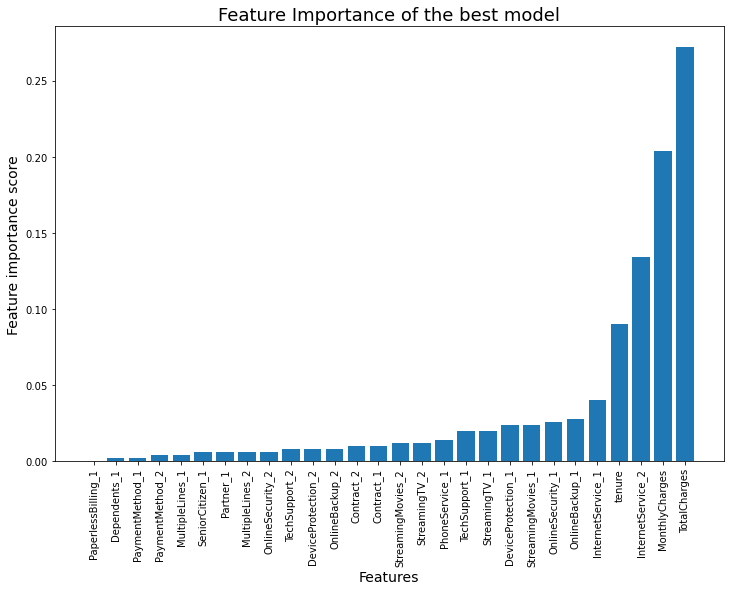

In [62]:
# analyzing the importance of each feature in the best model
sorted_index = adabclf2.feature_importances_.argsort()
plt.figure(figsize=(12,8))
plt.bar(X_train2.columns[sorted_index], adabclf2.feature_importances_[sorted_index])
plt.xticks(rotation = 90)
plt.xlabel("Features",fontsize=14)
plt.ylabel("Feature importance score",fontsize=14)
plt.title("Feature Importance of the best model",fontsize=18)

The above feature importance graph shows that the features **TotalCharges, MonthlyCharges, InternetService_Yes and tenure** contribute highly towards the predicting whether the customer will churn or not. While other features contribute less than 5% individually in predicting the outcome.

## References

Accuracy vs. F1-Score. Medium. (2021). Retrieved 17 May 2021, from https://medium.com/analytics-vidhya/accuracy-vs-f1-score-6258237beca2#:~:text=Accuracy%20is%20used%20when%20the,as%20in%20the%20above%20case.

Better Heatmaps and Correlation Matrix Plots in Python. Medium. (2021). Retrieved 17 May 2021, from https://towardsdatascience.com/better-heatmaps-and-correlation-matrix-plots-in-python-41445d0f2bec.

krishnaik06/Handle-Imbalanced-Dataset. GitHub. (2021). Retrieved 17 May 2021, from https://github.com/krishnaik06/Handle-Imbalanced-Dataset/blob/master/Handling%20Imbalanced%20Data-%20Over%20Sampling.ipynb.

Ksiresearch.org. (2021). Retrieved 17 May 2021, from https://ksiresearch.org/seke/seke15paper/seke15paper_182.pdf.

Improving customer retention for service based businesses. Quiq. (2021). Retrieved 17 May 2021, from https://quiq.com/improving-customer-retention/.

Sensitivity and specificity - Wikipedia. En.wikipedia.org. (2021). Retrieved 17 May 2021, from https://en.wikipedia.org/wiki/Sensitivity_and_specificity.

EDA and Prediction on Telecom Churn 80%acc. Kaggle.com. (2021). Retrieved 17 May 2021, from https://www.kaggle.com/josephchingchunchen/eda-and-prediction-on-telecom-churn-80-acc.